Training MSE: 19949734.574445404
Testing MSE: 18770326.29922457
Training MAE: 3918.511041805586
Testing MAE: 3759.097605163604
Training R^2: 0.14266294643295752
Testing R^2: 0.10576800934832209
Predicted price: [22911.47562183]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


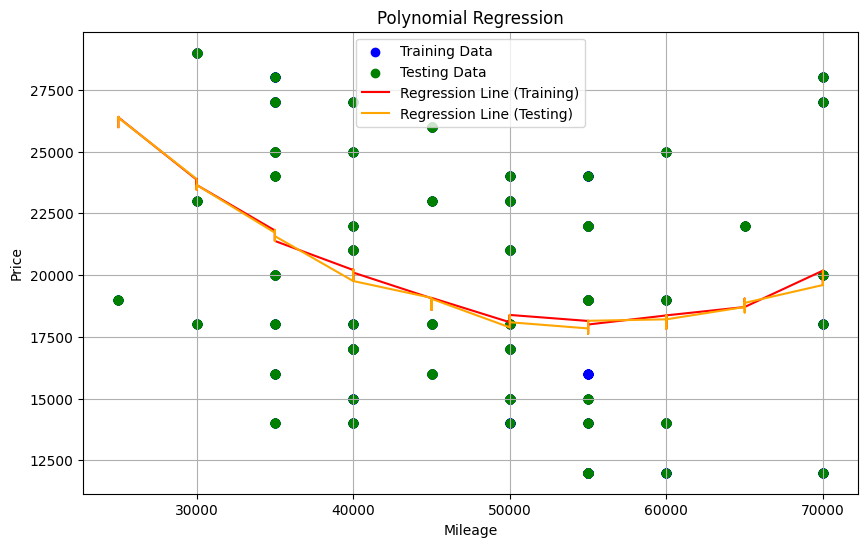

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Data Preparation
data = pd.read_csv('Car Data.csv')

# Step 2: Feature Engineering
# Selecting features and target variable
X = data[['Year', 'Mileage']]
y = data['Price']

# Step 3: Model Training
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)

    def fit(self, X, y):
        X_poly = self.poly_features.fit_transform(X)
        self.model = LinearRegression()
        self.model.fit(X_poly, y)

    def predict(self, X):
        X_poly = self.poly_features.transform(X)
        return self.model.predict(X_poly)

# Train the polynomial regression model
degree = 2  # Specify the degree of polynomial features
poly_regression = PolynomialRegression(degree=degree)
poly_regression.fit(X_train, y_train)

# Step 4: Model Evaluation
# Make predictions
y_train_pred = poly_regression.predict(X_train)
y_test_pred = poly_regression.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

# Step 5: Prediction
# Example: Predicting the price of a car with Year=2022 and Mileage=30000
new_data = np.array([[2022, 30000]])
predicted_price = poly_regression.predict(new_data)
print("Predicted price:", predicted_price)

# Step 6: Plotting the graph
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train['Mileage'], y_train, color='blue', label='Training Data')

# Plot testing data
plt.scatter(X_test['Mileage'], y_test, color='green', label='Testing Data')

# Plot regression line for training data
sort_axis_train = np.argsort(X_train['Mileage'])
plt.plot(X_train['Mileage'].iloc[sort_axis_train], y_train_pred[sort_axis_train], color='red', label='Regression Line (Training)')

# Plot regression line for testing data
sort_axis_test = np.argsort(X_test['Mileage'])
plt.plot(X_test['Mileage'].iloc[sort_axis_test], y_test_pred[sort_axis_test], color='orange', label='Regression Line (Testing)')

plt.title('Polynomial Regression')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
